In [1]:
#imports
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
# import 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC


In [38]:
# import the required libraries
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.model_selection import cross_val_score

In [4]:
# cross validation
from sklearn.model_selection import train_test_split

In [33]:
#Models
modelLR = LogisticRegression()
modelRF = RandomForestClassifier()
modelSVM = SVC()

In [6]:
# import data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [8]:
print("dimension of  data: {}".format(rawData.shape))

dimension of  data: (30000, 25)


In [9]:
print(rawData.groupby('default payment next month').size())

default payment next month
0    23364
1     6636
dtype: int64


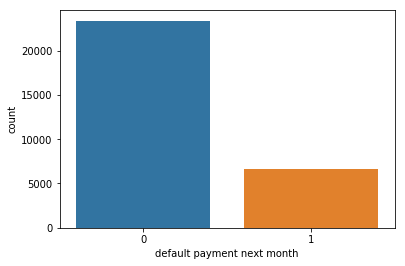

In [10]:
import seaborn as sns

sns.countplot(rawData['default payment next month'],label="Count")

In [11]:
rawData.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [12]:
#features
features = rawData.iloc[:, 0:24]
print('Summary of feature sample')
features.head()

Summary of feature sample


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [14]:
#dependent variable
depVar = rawData['default payment next month']

In [15]:
#Training Set (Feature Space: X Training)
X_train = (features[: 22500])
X_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [16]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 22500]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 22500


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [17]:
#Testing Set (X Testing)
X_test = features[-7500:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 7500
          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
22500  22501     180000    2          2         1   33     -1     -1     -1   
22501  22502     230000    2          1         2   33      0      0      0   
22502  22503      50000    2          2         2   44      0      0      2   
22503  22504     260000    2          2         2   32      0      0      0   
22504  22505     260000    2          2         2   33     -1     -1     -1   

       PAY_4    ...     BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
22500     -1    ...          1112      10383       1980       2672         0   
22501      0    ...         41354      42368      43161      45056      2000   
22502      3    ...         20857      20229      19623      19878      3155   
22503      0    ...        234260     227884     202178     198467     10000   
22504     -1    ...         28656       7497       7685      1

In [18]:
#Ground Truth (y_test) 
y_test = depVar[-7500:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 7500


22500    0
22501    0
22502    1
22503    1
22504    1
Name: default payment next month, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((16875, 24), (5625, 24))

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((12656, 24), (4219, 24))

In [21]:
#dependent variable
print(depVar)

0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       1
23       1
24       0
25       0
26       1
27       0
28       0
29       0
        ..
29970    0
29971    0
29972    0
29973    1
29974    1
29975    0
29976    1
29977    0
29978    0
29979    0
29980    0
29981    0
29982    1
29983    0
29984    0
29985    0
29986    0
29987    0
29988    0
29989    0
29990    0
29991    1
29992    0
29993    0
29994    1
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64


### Classifcation Modeling

#### Model Logistic Regression

In [26]:
modelLR.fit(X_train,y_train)
print("Training set accuracy: {:.3f}".format(modelLR.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(modelLR.score(X_test, y_test)))

Training set accuracy: 0.772
Test set accuracy: 0.779


#### Tuning C 

In [27]:
modelLR1 = LogisticRegression(C=1000.0, random_state=0)
modelLR1.fit(X_train,y_train)
print("Training set accuracy: {:.3f}".format(modelLR1.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(modelLR1.score(X_test, y_test)))

Training set accuracy: 0.772
Test set accuracy: 0.779


In [28]:
modelLR2 = LogisticRegression(C=.01, random_state=0)
modelLR2.fit(X_train,y_train)
print("Training set accuracy: {:.3f}".format(modelLR2.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(modelLR2.score(X_test, y_test)))

Training set accuracy: 0.772
Test set accuracy: 0.779


In [29]:
modelLR3 = LogisticRegression(C=.001, random_state=0)
modelLR3.fit(X_train,y_train)
print("Training set accuracy: {:.3f}".format(modelLR3.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(modelLR3.score(X_test, y_test)))

Training set accuracy: 0.772
Test set accuracy: 0.779


#### Feature Importance Random Forest

In [34]:
# from sklearn.ensemble import ExtraTreesClassifier
# modelRF = ExtraTreesClassifier(n_estimators=10)
modelRF.fit(X_train,y_train)
print(modelRF.feature_importances_)


[0.06953163 0.05461933 0.01204285 0.01728743 0.01214086 0.05506397
 0.10060403 0.03852537 0.02239306 0.02964542 0.02059657 0.01285255
 0.05216964 0.05191201 0.04600789 0.04614545 0.04532235 0.04857012
 0.0487098  0.04308663 0.04157887 0.04276025 0.04233055 0.04610335]


KeyError: '[ 2  4 11  3 10  8  9  7 20 22 21 19 16 14 23 15 17 18 13 12  1  5  0  6] not in index'

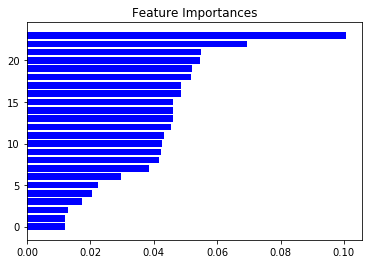

In [35]:
importances = modelRF.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [39]:
modelRF.fit(X_train,y_train)
print("Training set accuracy: {:.3f}".format(modelRF.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(modelRF.score(X_test, y_test)))
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

Training set accuracy: 0.980
Test set accuracy: 0.796
[0.79383886 0.80559507 0.79682314]


0.9800884955752213

In [31]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
X = features
target = depVar

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=modelRF, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=10, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [33]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 20


### Recursive Feature Elimination with Cross Validation

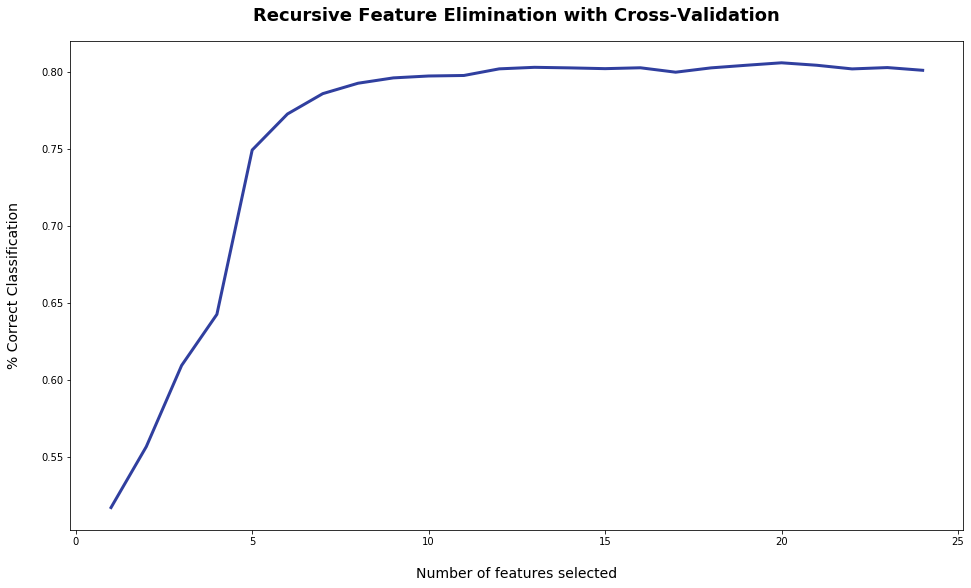

In [34]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()


### Random Forest Modeling Tuning # of Trees

In [35]:
# Create the model with 100 trees
modelRF1 = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
modelRF1.fit(X_train,y_train)

print("Training set accuracy: {:.3f}".format(modelRF1.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(modelRF1.score(X_test, y_test)))

Training set accuracy: 1.000
Test set accuracy: 0.808


In [36]:
# Create the model with 200 trees
modelRF2 = RandomForestClassifier(n_estimators=200, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
modelRF2.fit(X_train,y_train)

print("Training set accuracy: {:.3f}".format(modelRF2.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(modelRF2.score(X_test, y_test)))

Training set accuracy: 1.000
Test set accuracy: 0.805


In [37]:
# Create the model with 500 trees
modelRF3 = RandomForestClassifier(n_estimators=500, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
modelRF3.fit(X_train,y_train)

print("Training set accuracy: {:.3f}".format(modelRF3.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(modelRF3.score(X_test, y_test)))

Training set accuracy: 1.000
Test set accuracy: 0.806


### Support Vector Machine Modeling Tuning Kernel

In [38]:
modelSVM.fit(X_train,y_train)
print("Training set accuracy: {:.3f}".format(modelSVM.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(modelSVM.score(X_test, y_test)))

C:\Users\san60939\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training set accuracy: 0.777
Test set accuracy: 0.773


In [39]:
modelSVM1 = SVC (C=1.0, kernel='rbf', degree=3, gamma='auto')
modelSVM1.fit(X_train,y_train)
print("Training set accuracy: {:.3f}".format(modelSVM.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(modelSVM.score(X_test, y_test)))

Training set accuracy: 0.777
Test set accuracy: 0.773


In [42]:
modelSVM2 = SVC (C=5.0, kernel='linear', degree=3, gamma='auto')
modelSVM2.fit(X_train,y_train)
print("Training set accuracy: {:.3f}".format(modelSVM.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(modelSVM.score(X_test, y_test)))

Training set accuracy: 0.777
Test set accuracy: 0.773


In [43]:
modelSVM2 = SVC (C=100.0, kernel='poly', degree=3, gamma='auto')
modelSVM2.fit(X_train,y_train)
print("Training set accuracy: {:.3f}".format(modelSVM.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(modelSVM.score(X_test, y_test)))

Training set accuracy: 0.777
Test set accuracy: 0.773
